<a href="https://colab.research.google.com/github/yunju-1118/ESAA/blob/main/ESAA_OB_week01_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **모델 훈련**

### **1) 선형 회귀**
$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ...+\theta_n x_n $

일반적으로 선형 모델은 입력 특성의 가중치 합과 편향이라는 상수를 더해 예측을 만든다. 해당 식ㅇ느 벡터 형태로 더욱 간단하게 쓸 수 있다.

$\hat{y} = h_\theta(x) = \theta x$

- $\theta$는 편향 $\theta_0$과 $\theta_1$에서 $\theta_n$까지의 특성 가중치를 담은 모델의 파라미터 벡터이다.
- $x$는 $x_0$에서 $x_n$까지 담은 샘플의 특성 벡터이다.
- $h_\theta$는 모델 파라미터 $\theta$를 사용한 가설 함수이다.

선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 $\theta$를 찾아야 한다. 실제로는 RMSE보다 평균 제곱 오차(MSE)를 최소화하는 것이 같은 결과를 내면서 더욱 간단하다.

훈련 세트 $x$에 대한 선형 회귀 가설 $h_\theta$의 MSE는 다음과 같다.

MSE($X, h_\theta$) = $\frac{1}{m} \sum_{i=1}^{m} (\theta^T x^{(i)} - y^{(i)} )^2$

#### **1.1) 정규방정식**
비용 함수를 최소화하는 $\theta$ 값을 찾기 위한 공식이 **정규방정식**이다.

$\hat{\theta} = (X^T X)^{-1}X^Ty$
- $\hat{\theta}$는 비용 함수를 최소화하는 $\theta$값이다.
- $y$는 $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터이다.

In [1]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

해당 데이터에서 정규방정식을 사용해 $\hat{\theta}$를 계산해보자.

In [2]:
X_b = np.c_[np.ones((100,1)), X]    # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[3.66095518],
       [3.22816464]])

기대한 $\theta$와 매우 비슷하지만 잡음으로 원래 함수의 파라미터를 정확하게 재현하지 못하였다.

$\hat{\theta}$을 사용해 예측해보자.

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.66095518],
       [10.11728446]])

In [5]:
import matplotlib.pyplot as plt

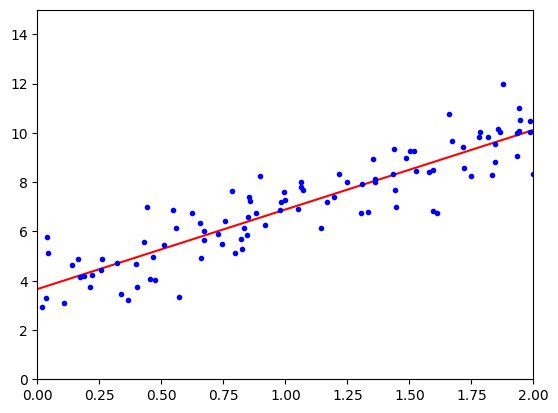

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

사이킷런에서 선형 회귀를 수행해보자.

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.66095518] [[3.22816464]]
[[ 3.66095518]
 [10.11728446]]


LinearRegression 클래스는 scipy.linalg.lstsq( ) 함수를 기반으로 한다. 이 함수를 직접 호출할 수도 있다.

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.66095518],
       [3.22816464]])

이 함수는 $\hat{\theta} = X^+ y$를 계산한다. 여기서 $X^+$는 $X$의 유사역행렬이다. np.linalg.pinv( ) 함수를 사용해 유사역행렬을 직접 구할 수 있다.

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[3.66095518],
       [3.22816464]])

유사역행렬 자체는 **특잇값 분해(SVD)** 라 부르는 표준 행렬 분해 기법을 사용해 계산된다.

정규방정식을 계산하는 것보다 이 방식이 훨씬 효율적이며 극단적인 경우도 처리할 수 있다. 실제로 $m<n$ 이거나 어떤 특성이 중복되어 행렬 $X^TX$의 역행렬이 없다면 정규방정식이 작동하지 않는다. 하지만 유사역행렬은 항상 구할 수 있다.

#### **1.2) 계산 복잡도**
정규방정식은 $(n+1)\times(n+1)$ 크기가 되는 $X^TX$의 역행렬을 계산한다. 역행렬을 계산하는 **계산 복잡도** 는 일반적으로 $O(n^{2.4})$에서 $O(n^3)$ 사이이다. 다시 말해 특성 수가 두 배로 늘어나면 계산 시간이 대략 $5.3(=2^{2.4})$에서 $8(=2^3)$배로 증가한다.

사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 $O(n^2)$이다. 특성의 개수가 두 배로 늘어나면 계산 시간이 대략 4배가 된다.

또한 학습된 선형 회귀 모델은 예측이 매우 빠르다. 예측 계산 복잡도는 샘플 수와 특성 수에 선형적이다.

### **2) 경사하강법**
**경사 하강법** 은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다. 경사 하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것이다. 파라미터 벡터 $\theta$에 대해 비용 함수의 현재 gradient를 계산한다. 그리고 gradient가 감소하는 방향으로 진행한다.

경사 하강법에서 중요한 파라미터는 스텝의 크기로 **학습률(learning rate)** 하이퍼파라미터로 결정된다. 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다.

한편 학습률이 너무 크면 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 한다.

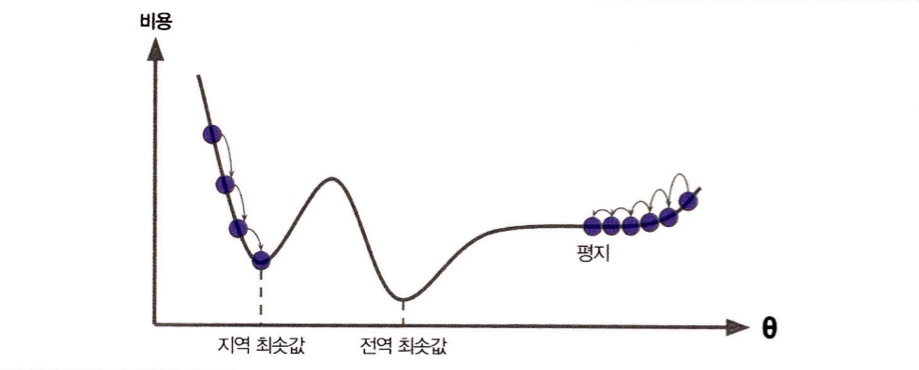

다음 그림을 통해 경사 하강법의 두 가지 문제점을 볼 수 있다. 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 **전역 최솟값(global minimum)** 보다 덜 좋은 **지역 최솟값(local minimum)** 에 수렴한다. 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못한다.

다행히 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수이다. 이는 지역 최솟값이 없고 하나의 전역 최솟값만 존재한다는 뜻이다. 또한 연속된 함수이고 기울기가 갑자기 변하지 않는다. 이 두 사실로부터 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장한다.

모델 훈련은 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 일이다. 이를 모델의 **파라미터 공간**에서 찾는다고 말한다. 모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색은 더 어려워진다.

#### **2.1) 배치 경사 하강법**
경사 하강법을 구현하려면 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 gradient를 계산해야 한다. 이를 **편도 함수**라고 한다.

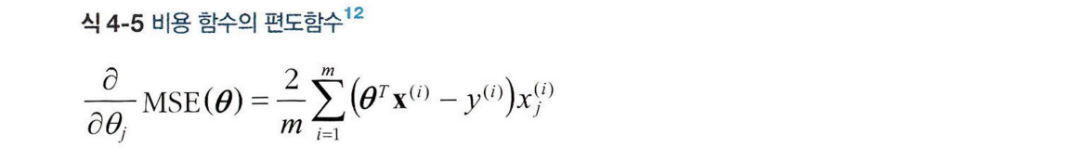

우리는 편도함수를 각각 계산하는 대신 gradient 벡터를 이용해 한꺼번에 계산할 수 있다.
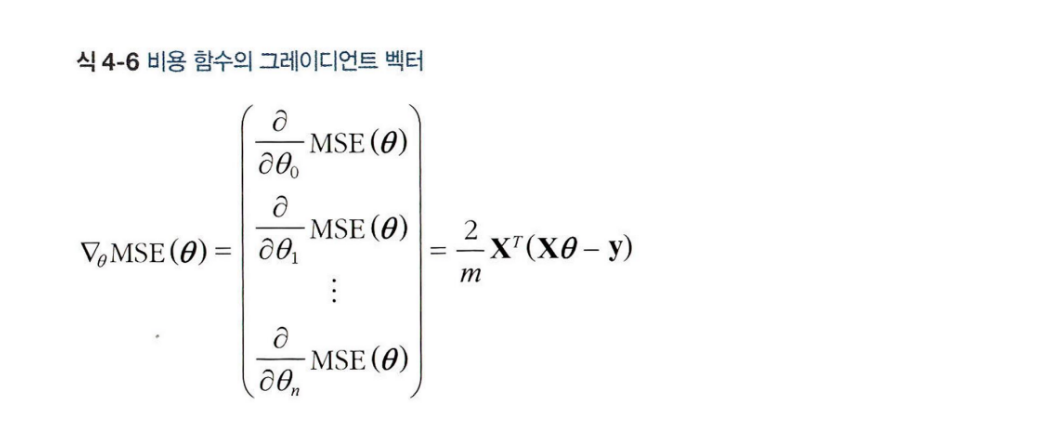

경사 하강법은 특성 수에 민감하지 않다. 따라서, 수십만 개의 특성에서 선형회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 훨씬 빠를 수 있다.

위로 향하는 gradient 벡터가 구해지면 반대 방향인 아래로 내려가야 한다. 여기서 학습률이 사용된다. 내려가는 스텝의 크기를 결정하기 위해 gradient 벡터에 학습률을 곱한다.

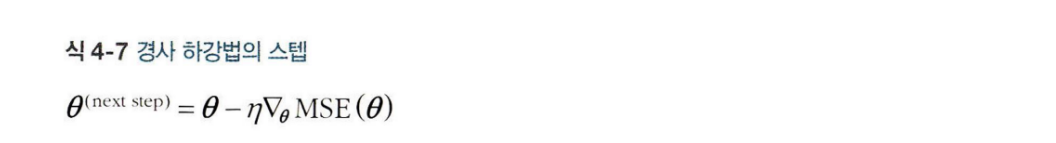

이 알고리즘을 간단히 구현해보자.

In [11]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta*gradients

In [12]:
theta

array([[3.66095518],
       [3.22816464]])

학습률이 너무 낮으면 알고리즘이 최적점에 도달하는 데에 너무 많은 시간이 걸리고, 학습률이 너무 높으면 발산한다. 따라서, 적절한 학습률을 찾기 위해 우리는 그리드 탐색을 사용한다. 하지만, 그리도 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야 한다.

간단한 해결책은 반복횟수를 아주 크게 지정하고 gradient 벡터가 아주 작아지면 경사 하강법이 거의 최솟값에 도달한 것이므로 알고리즘을 중지하는 것이다.

#### **2.2) 확률적 경사 하강법**
배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 gradient를 계산하는 것이다. 훈련 세트가 커지면 매우 느려진다. 하지만, **확률적 경사 하강법** 은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 gradient를 계산한다. 매 반복에서 다뤄야 할 데이터가 매우 적어 알고리즘이 훨씬 빠르고, 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있다.

반면에, 확률적이기 때문에 배치 경사 하강법보다 훨씬 불안정하다. 시간이 지나면 최솟값에 매우 근점하지만, 최적치는 아닐 수 있다.

무작위성은 지역 최솟값에서 탈출시키지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서는 좋지 않다. 이 딜레마를 해결하는 방법은 학습률을 점진적으로 감소시키는 것이다. 시작할 때는 학습률을 크게 하고, 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 한다. 매 반복에서 학습률을 결정하는 함수를 **학습 스케줄**이라고 한다. 학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈춰버릴 수 있다. 학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 일찍 중지해 지역 최솟값에 머무를 수 있다.

In [14]:
n_epochs = 50
t0, t1 = 5, 50    # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1)   # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta - eta*gradients

In [15]:
theta

array([[3.6791799 ],
       [3.23023531]])

샘플을 무작위로 선택하기에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고, 어떤 샘플은 전혀 선택되지 못할 수도 있다. 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있다.

사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 SGDRegressor 클래스를 사용한다.

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.61950156]), array([3.20241726]))

#### **2.3) 미니배치 경사 하강법**
미니배치 경사 하강법은 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 gradient를 계산하는 것이 아닌, **미니배치** 라 부르는 임의의 작은 샘플 세트에 대해 gradient를 계산한다. 확률적 경사하강법에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상이다.

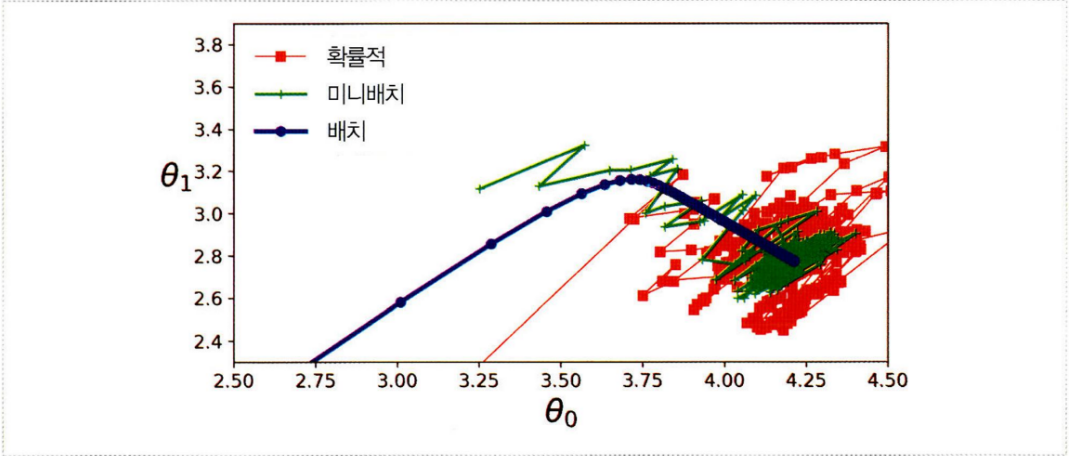

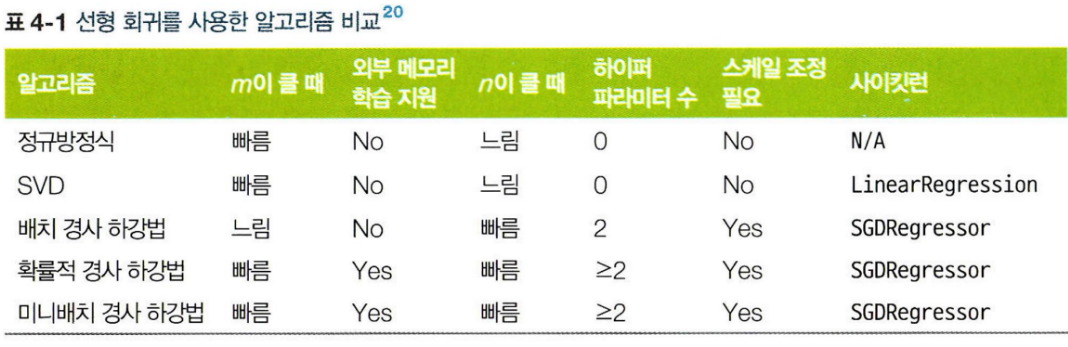

### **3) 다항 회귀**

In [18]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5* X**2 + X + 2 + np.random.randn(m,1)

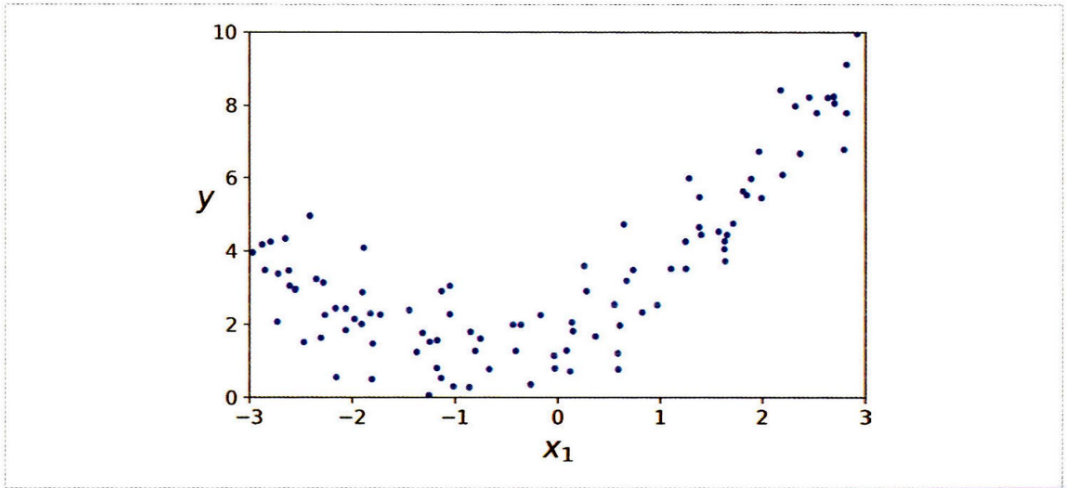

위와 같이 잡음이 포함된 비선형 데이터셋은 직선이 맞지 않을 것이다. 그러므로 사이킷런의 PolynomialFeatures를 이용해 훈련 데이터를 변환한다. 훈련 세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가한다.

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[2.02808202]
[2.02808202 4.11311668]


In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.85410925]), array([[0.87851009, 0.54176878]]))

특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있다. PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문이다.

### **4) 학습 곡선**

고차 다항 회귀 모델의 경우 심각하게 훈련 데이터에 과대적합될 수 있는 반면, 선형 모델은 과소적합된다. 모델의 일반화 성능을 추정하기 위한 방법으로는 교차 검증이 있다. 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 모델이 과대적합된 것이다.

또 다른 방법은 **학습 곡선**을 살펴보는 것이다. 이 그래프는 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타낸다. 이 그래프를 생성하기 위해서는 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 된다. 다음 코드는 주어진 훈련 데이터에서 모델의 학습 곡선을 그리는 함수를 정의한다.

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
  train_errors, val_errors = [],[]
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

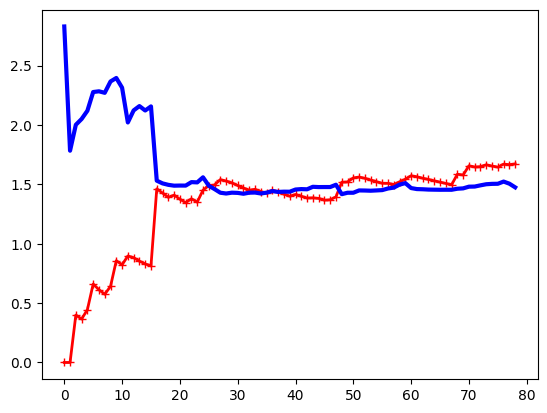

In [28]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

해당 그래프를 통해 훈련 세트에 샘플이 추가됨에 따라 잡음이 있고, 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것이 불가능하다는 것을 알 수 있다. 그래서 곡선이 어느 정도 평편해질 때까지 오차가 계속 상승한다. 검증 데이터에선느 모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화되지 않아 검증 오차가 초기에 매우 크다. 모델에 훈련 샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소한다. 하지만, 선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해져 훈련 세트의 그래프와 가까워진다.

이 학습 곡선이 과소적합 모델의 전형적인 모습이다.

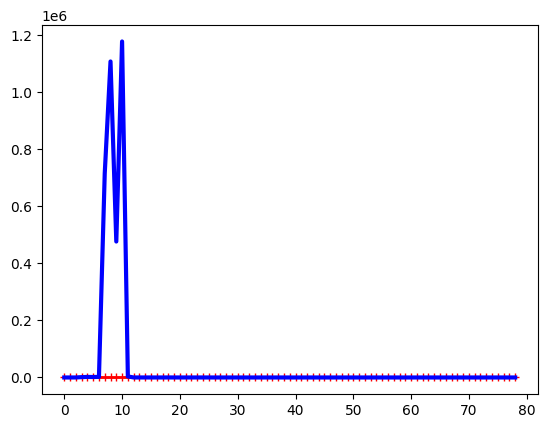

In [29]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X,y)